In [58]:
%matplotlib inline
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
from matplotlib.ticker import NullFormatter

from scipy.sparse import csr_matrix, lil_matrix, vstack
from sklearn.decomposition import TruncatedSVD
from sklearn.manifold import TSNE
import numpy as np
import pandas as pd
from nltk import word_tokenize
from nlp import load_dataset
import os
#nltk.download('punkt')

In [2]:
DATA_FOLDER = 'data'
dataset = load_dataset(os.path.join(DATA_FOLDER, 'de_politik_news.py'), cache_dir=os.path.join(DATA_FOLDER, '.de-politic-news'))

Using custom data configuration default


Create vocabulary

In [3]:
word_set = set()
for text in dataset['validation']['text']:
    word_set.update(word_tokenize(text.lower()))
for text in dataset['test']['text']:
    word_set.update(word_tokenize(text.lower()))

word_dict =  { word : i for i,word in enumerate(list(word_set))}

Create BOW validation vectors

In [4]:
embeddings_valid = lil_matrix((len(dataset['validation']['text']), len(word_set)), dtype=np.int8)
for i, text in enumerate(dataset['validation']['text']):
    for word in word_tokenize(text.lower()):
        if word in word_dict:
            embeddings_valid[i, word_dict[word]] += 1

Create BOW test vectors

In [5]:
embeddings_test = lil_matrix((len(dataset['test']['text']), len(word_set)), dtype=np.int8)
for i, text in enumerate(dataset['test']['text']):
    for word in word_tokenize(text.lower()):
        if word in word_dict:
            embeddings_test[i, word_dict[word]] += 1

Reduce dimentions via SVD and t-SNE

In [73]:
embeddings = vstack([embeddings_test, embeddings_valid])
classes = dataset['test']['class']+ dataset['validation']['class']
svd = TruncatedSVD(n_components=2)
svd_results_bow = svd.fit_transform(embeddings)

svd = TruncatedSVD(n_components=1024)
svd_long_bow = svd.fit_transform(embeddings)
tsne = TSNE(n_components=2, random_state=0)
tsne_results_bow = tsne.fit_transform(svd_long_bow)

Plot data with classes shown different colors

In [80]:
def plot_svd_and_t_sne():
    class_color_dict = {'far-left':0, 'center-left':1, 'center':2, 'center-right':3, 'far-right':4}
    class_color = [class_color_dict[i] for i in classes]#dataset['test']['class']]
    
    plt.figure(figsize=(15, 8))
    plt.subplot(1, 2, 1)
    plt.title('SVD',fontsize=20,color='black')
    svd_plot = plt.scatter(svd_results_bow[:, 0], svd_results_bow[:, 1],
                           c=class_color, label = classes)#dataset['test']['class'])
    plt.legend(handles=svd_plot.legend_elements()[0], loc='upper left',
           labels=['far-left', 'center-left', 'center','center-right','far-right'],fontsize=15)
    plt.subplot(1, 2, 2)
    plt.title('t-SNE (over SVD)',fontsize=20)
    tsne_plot = plt.scatter(tsne_results_bow[:, 0], tsne_results_bow[:, 1],
                            c=class_color, label = classes)#dataset['validation']['class'])
    plt.legend(handles=tsne_plot.legend_elements()[0], 
           labels=['far-left', 'center-left', 'center','center-right','far-right'],fontsize=15)
    plt.show()
    plt.clf()


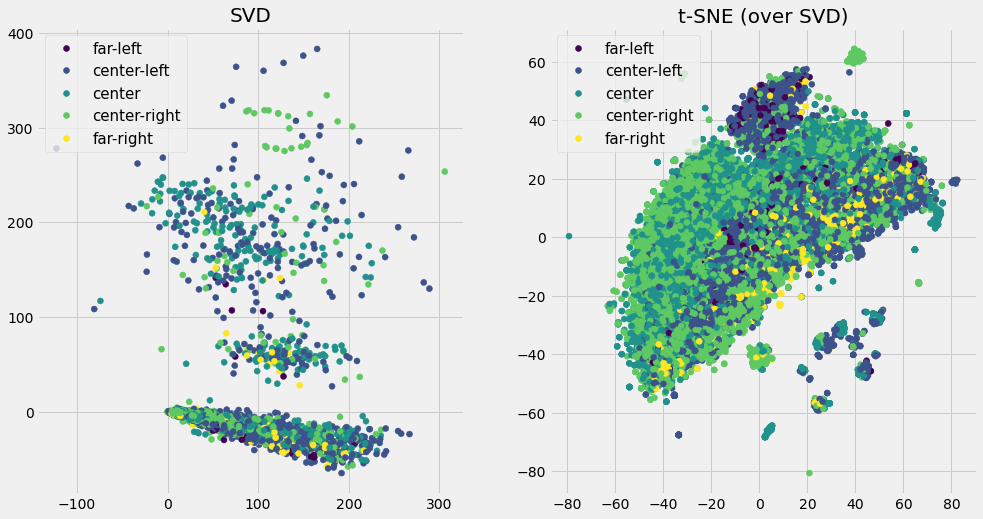

<Figure size 432x288 with 0 Axes>

In [81]:
with plt.style.context('fivethirtyeight'):
    plot_svd_and_t_sne()

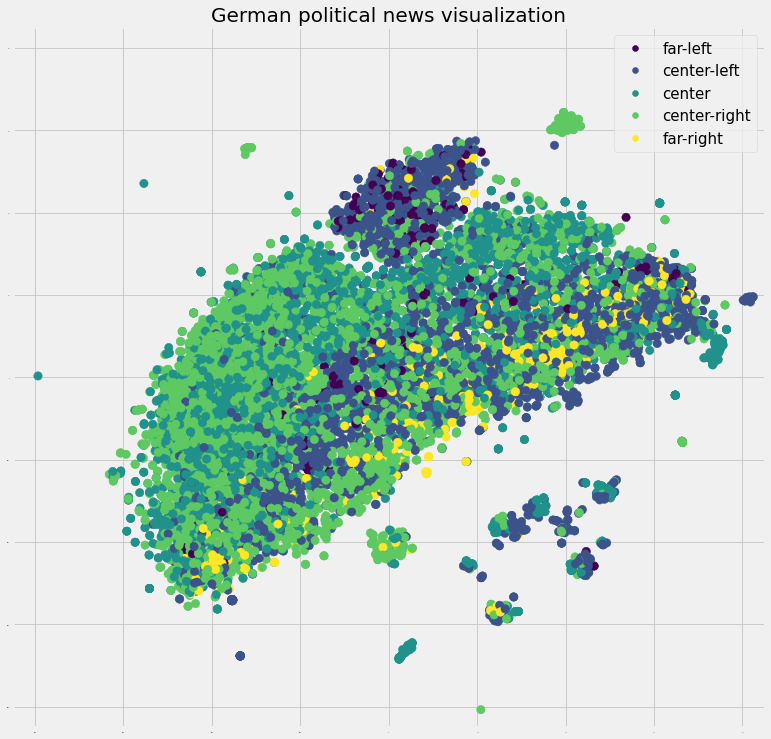

<Figure size 432x288 with 0 Axes>

In [90]:
def draw_plot():
    
    class_color_dict = {'far-left':0, 'center-left':1, 'center':2, 'center-right':3, 'far-right':4}
    class_color = [class_color_dict[i] for i in classes]#dataset['test']['class']]
    
    fig, ax = plt.subplots(figsize=(12, 12))

    ax.set_title('German political news visualization', size=20)

    scatter_plt = ax.scatter(tsne_results_bow[:, 0], tsne_results_bow[:, 1],
                            c=class_color, s=70, label = classes)#dataset['test']['class'])
    ax.legend(handles=scatter_plt.legend_elements()[0], 
           labels=['far-left', 'center-left', 'center','center-right','far-right'],fontsize=15)

    ax.tick_params(axis="x", labelsize=0)
    ax.tick_params(axis="y", labelsize=0)
    
    ax.set_ylim(ymin=-85, ymax=85)
    ax.set_xlim(xmin=-85, xmax=85)

    plt.show()
    plt.clf()
    
with plt.style.context('fivethirtyeight'):
    draw_plot()